In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import pandas as pd

In [2]:
enroll = pd.read_csv('data/수강.csv')
enroll

,강좌번호,학생번호,신청일,점수
0,C401,92414033,98/03/02,85.0
1,C301,92414033,98/03/02,80.0
2,C421,92414033,98/03/02,NaN
3,C401,95414058,98/03/03,90.0
4,C301,95414058,98/03/03,80.0
5,C312,95414058,98/03/03,80.0
6,C401,92514023,98/03/03,NaN
7,C301,92514023,98/03/03,70.0
8,C401,92414029,98/03/03,90.0
9,C421,92414029,98/03/03,NaN


In [3]:
group = enroll.groupby('강좌번호').size().to_frame("인원수")
cou = pd.read_csv('data/강좌.csv')
cou
merge = cou.merge(group, on='강좌번호')
merge

,강좌번호,강좌이름,강의시수,강의실,담당교수,최대인원,인원수
0,C301,파일처리론,3,506,221,100,6
1,C401,데이터베이스,3,414,221,80,5
2,C421,알고리즘,3,510,228,80,3
3,C312,자료구조,2,510,228,100,3
4,E221,논리회로,3,304,311,100,4
5,A109,한국의건축문화,2,101,509,120,2


In [4]:
labels = merge['강좌이름']
values = merge['인원수']
labels, values

(0      파일처리론
 1     데이터베이스
 2       알고리즘
 3       자료구조
 4       논리회로
 5    한국의건축문화
 Name: 강좌이름, dtype: object,
 0    6
 1    5
 2    3
 3    3
 4    4
 5    2
 Name: 인원수, dtype: int64)

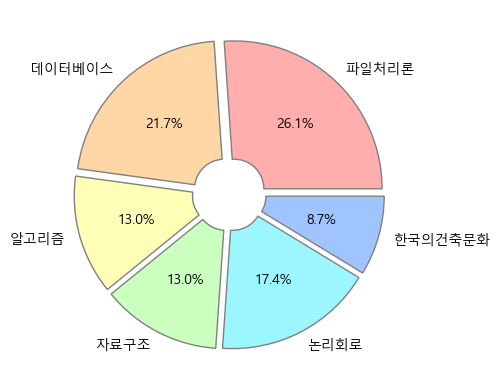

In [5]:
colors = ['#FFADAD','#FFD6A5','#FDFFB6','#CAFFBF','#9BF6FF','#A0C4FF']
plt.pie(values, labels=labels, autopct='%.1f%%', explode=[0.05]*len(values),
        colors=colors, wedgeprops={'width':0.8, 'edgecolor':'gray'})
#plt.legend(loc=(1.2, 0.5))
plt.show()

In [6]:
stu = pd.read_csv('data/학생.csv')
stu

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509
5,95454003,이재영,건축,4,76/02/06,509
6,95414058,박혜경,전산,4,76/03/12,221
7,96414404,김수정,전산,3,77/12/22,228
8,96414405,홍길동,전산,3,77/12/22,228


In [7]:
group = stu.groupby('학생학과').size()
group

학생학과
건축    2
전산    5
전자    2
dtype: int64

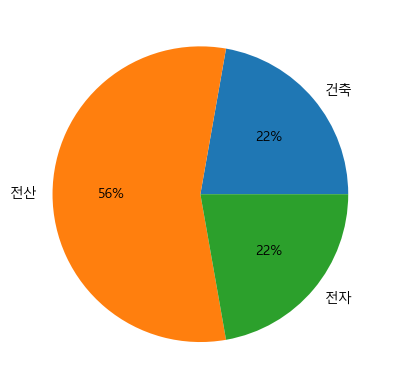

In [8]:
labels = group.index
values = group.values

plt.pie(values, labels=labels, autopct='%.0f%%')
plt.show()

In [9]:
def grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

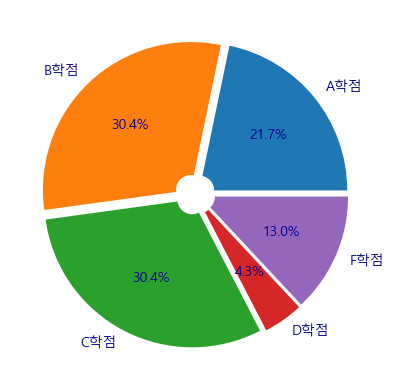

In [10]:
enroll = pd.read_csv('data/수강.csv')
enroll['학점'] = enroll['점수'].apply(grade)
group = enroll.groupby('학점').size()
labels = group.index
values = group.values

plt.pie(values, labels=labels+'학점', autopct='%.1f%%', explode=[0.04]*len(group),
        wedgeprops={'width':0.9},
        textprops={'color':'darkblue', 'size':10})
plt.show()

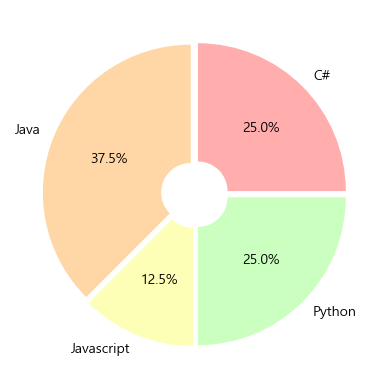

In [20]:
colors = ['#FFADAD','#FFD6A5','#FDFFB6','#CAFFBF','#9BF6FF','#A0C4FF']
df = pd.read_csv('data/score.csv')
group = df.groupby('SW특기').size()
plt.pie(group.values, labels=group.index, autopct='%.1f%%', explode=[0.03]*len(group), 
        wedgeprops={'width':0.8}, colors=colors)
plt.show()
